# Notebook ARN_Lab03

@Authors: Parisod Nathan & Lestiboudois Maxime

**EXERCICE 1**

In [1]:
# Disable warnings for cleaner outputimport warnings
warnings.filterwarnings('ignore')

# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import class_weight

# TensorFlow / Keras
import tensorflow as tf
from keras import layers
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adamax

In [2]:
# Load EEG training and test data
train_1 = pd.read_csv('EEG_mouse_data_1.csv')
train_2 = pd.read_csv('EEG_mouse_data_2.csv')
test = pd.read_csv('EEG_mouse_data_test.csv')

# Concatenate training data
train = pd.concat([train_1, train_2], ignore_index=True)

In [4]:
# Feature and target column selection
features = train.columns[1:26]
X_train = train[features]
X_test = test[features]

y_train = train['state']

In [6]:
# Normalization and conversion of normalized data into a DataFrame
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)

In [8]:
# Quick check
print(X_train_scaled.head())
print(X_test_scaled.head())

   amplitude_around_1_Hertz  amplitude_around_2_Hertz  \
0                 -0.209955                 -0.081998   
1                 -0.183434                 -0.325791   
2                 -0.143389                  3.683546   
3                 -0.443261                  0.947062   
4                 -0.187587                 -0.238456   

   amplitude_around_3_Hertz  amplitude_around_4_Hertz  \
0                 -0.105121                 -0.027861   
1                 -0.230518                  0.068381   
2                  1.390184                  0.315788   
3                  2.070365                  0.140069   
4                 -0.177577                  0.177870   

   amplitude_around_5_Hertz  amplitude_around_6_Hertz  \
0                  0.818127                 -0.239219   
1                  0.740384                  0.553920   
2                  0.036759                 -0.564602   
3                 -0.510886                 -0.573552   
4                  0.570556  

In [9]:
# Configuration of 3-fold cross-validation with shuffling
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Display of indices for validation
for train_index, val_index in kf.split(X_train_scaled):
    print("Indices entraînement:", train_index)
    print("Indices validation:", val_index)

Indices entraînement: [    0     2     3 ... 40859 40860 40862]
Indices validation: [    1     4     6 ... 40856 40857 40861]
Indices entraînement: [    1     2     4 ... 40859 40860 40861]
Indices validation: [    0     3     5 ... 40851 40858 40862]
Indices entraînement: [    0     1     3 ... 40858 40861 40862]
Indices validation: [    2     9    10 ... 40854 40859 40860]


## First experiment

In [10]:
# Prepare and encode the labels
y_binary = y_train.replace({'n': 'asleep', 'r': 'asleep', 'w': 'awake'})

le = LabelEncoder()
y_encoded = le.fit_transform(y_binary)

In [11]:
# Creation and training of the MLP model
model = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_encoded, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8728 - loss: 0.3265 - val_accuracy: 0.8696 - val_loss: 0.3194
Epoch 2/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8938 - loss: 0.2635 - val_accuracy: 0.8680 - val_loss: 0.3202
Epoch 3/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8971 - loss: 0.2629 - val_accuracy: 0.8724 - val_loss: 0.3144
Epoch 4/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9014 - loss: 0.2545 - val_accuracy: 0.8720 - val_loss: 0.3142
Epoch 5/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9032 - loss: 0.2500 - val_accuracy: 0.8753 - val_loss: 0.3107
Epoch 6/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9007 - loss: 0.2500 - val_accuracy: 0.8714 - val_loss: 0.3173
Epoch 7/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9012 - loss: 0.2505 - val_accuracy: 0.8688 - val_loss: 0.3232
Epoch 8/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9061 - loss: 0.2416 - 

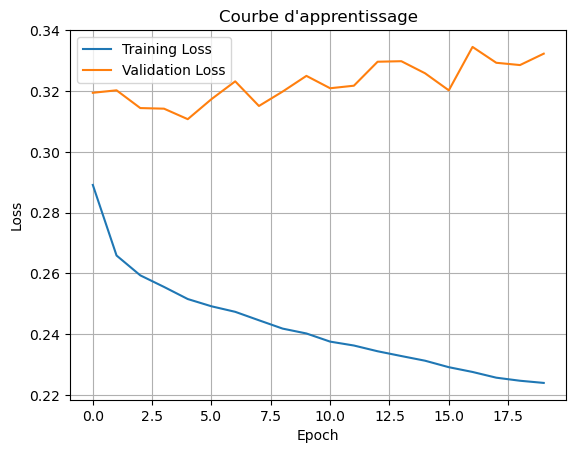

In [12]:
# Visualization of the learning curve (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid()
plt.show()

1277/1277 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step


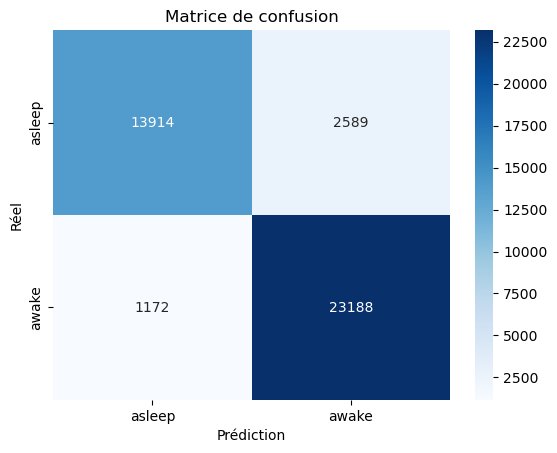

              precision    recall  f1-score   support

      asleep       0.92      0.84      0.88     16503
       awake       0.90      0.95      0.92     24360

    accuracy                           0.91     40863
   macro avg       0.91      0.90      0.90     40863
weighted avg       0.91      0.91      0.91     40863



In [13]:
# Visualization of the confusion matrix and Classification report
# Predictions on the training data
y_pred = (model.predict(X_train_scaled) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_encoded, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

# Classification report (F1-score, precision, recall)
print(classification_report(y_encoded, y_pred, target_names=le.classes_))

## Second experiment

In [14]:
# Prepare and encode the labels
y_binary = y_train.replace({'n': 'asleep', 'r': 'asleep', 'w': 'awake'})

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)  # y_train contient 'w', 'n', 'r'

# One-hot encoding
y_onehot = to_categorical(y_encoded)

In [15]:
# Creation and training of the MLP model
model = Sequential([
    InputLayer(input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 sorties pour les 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_onehot, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8440 - loss: 0.4393 - val_accuracy: 0.8543 - val_loss: 0.3927
Epoch 2/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8876 - loss: 0.3143 - val_accuracy: 0.8593 - val_loss: 0.3777
Epoch 3/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8904 - loss: 0.3069 - val_accuracy: 0.8543 - val_loss: 0.3916
Epoch 4/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8897 - loss: 0.3035 - val_accuracy: 0.8594 - val_loss: 0.3853
Epoch 5/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8904 - loss: 0.3066 - val_accuracy: 0.8562 - val_loss: 0.3920
Epoch 6/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8927 - loss: 0.2954 - val_accuracy: 0.8587 - val_loss: 0.3821
Epoch 7/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8923 - loss: 0.2941 - val_accuracy: 0.8544 - val_loss: 0.3949
Epoch 8/20
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8936 - loss: 0.2891 - 

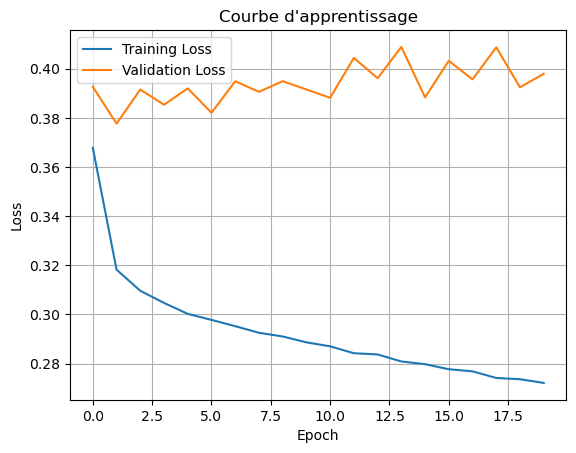

In [16]:
# Visualization of the learning curve (loss)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.grid()
plt.show()

In [17]:
# Predictions and evaluation
# Predictions (returns probabilities → take the class with the highest probability)
y_pred_probs = model.predict(X_train_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_onehot, axis=1)  # Because y_onehot is one-hot encoded

# Quick check
print(classification_report(y_true, y_pred, target_names=le.classes_))

1277/1277 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step


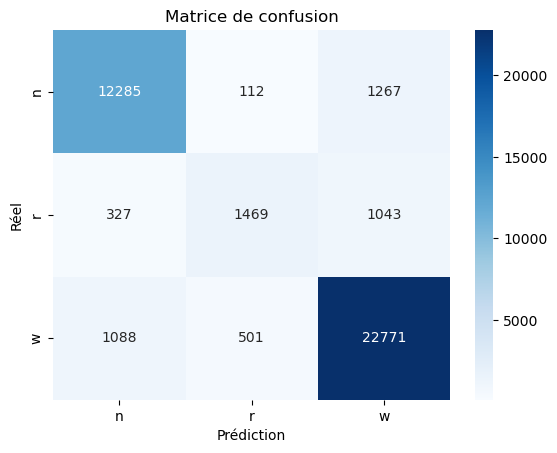

In [19]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Prédiction')
plt.ylabel('Réel')
plt.title('Matrice de confusion')
plt.show()

## Competition

In [20]:
# Combine the two training datasets (vertical concatenation without shuffling)
data = pd.concat([train_1, train_2], ignore_index=True)
print("Taille données entraînement :", data.shape)
print("Taille données test :", test.shape)
print(data.head(5))  # Display the size of the training and test sets, and preview the first 5 rows

Taille données entraînement : (40863, 102)
Taille données test : (80109, 101)
  state  amplitude_around_1_Hertz  amplitude_around_2_Hertz  \
0     n                  0.000009                  0.000014   
1     n                  0.000010                  0.000010   
2     n                  0.000011                  0.000077   
3     w                  0.000003                  0.000031   
4     w                  0.000010                  0.000011   

   amplitude_around_3_Hertz  amplitude_around_4_Hertz  \
0                  0.000013                  0.000014   
1                  0.000011                  0.000015   
2                  0.000034                  0.000019   
3                  0.000044                  0.000016   
4                  0.000012                  0.000017   

   amplitude_around_5_Hertz  amplitude_around_6_Hertz  \
0                  0.000023                  0.000009   
1                  0.000022                  0.000017   
2                  0.000013  

In [21]:
# Select 25 amplitude-based features
feature_cols = [col for col in data.columns if col.startswith('amplitude_')][:25]

# Extract features and labels from the combined training dataset
X = data[feature_cols].values
y_labels = data['state'].values

# Encode labels numerically and apply one-hot encoding
unique_classes = np.unique(y_labels)            # ex: array(['n','r','w'], dtype=object)
class_to_idx = {cls: idx for idx, cls in enumerate(unique_classes)}
y_num = np.array([class_to_idx[cls] for cls in y_labels])

# One-hot encoding of labels
num_classes = len(unique_classes)  # Should be 3
y_onehot = np.eye(num_classes)[y_num]

# Normalize the features using StandardScaler (fitted on training set)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# Compute class weights to handle class imbalance during training
class_counts = {cls: (y_labels == cls).sum() for cls in unique_classes}
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_num), y=y_num)
class_weight_dict = {i: w for i, w in enumerate(weights)}
print("Répartition des classes :", class_counts)
print("Poids de classe utilisés :", {unique_classes[i]: round(w, 3) for i, w in class_weight_dict.items()})

Répartition des classes : {'n': 13664, 'r': 2839, 'w': 24360}
Poids de classe utilisés : {'n': 0.997, 'r': 4.798, 'w': 0.559}


In [22]:
# Define a basic MLP architecture with dropout and batch normalization
def create_mlp(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adamax(), loss='categorical_crossentropy', metrics=['accuracy'])   # Compile the model with Adamax optimizer and categorical crossentropy loss
    return model

# Perform 10-fold time series cross-validation (without shuffling)
tscv = TimeSeriesSplit(n_splits=10)
fold = 1
all_y_true, all_y_pred = [], []

for train_idx, val_idx in tscv.split(X_scaled):
    X_train_cv, X_val_cv = X_scaled[train_idx], X_scaled[val_idx]
    y_train_cv, y_val_cv = y_onehot[train_idx], y_num[val_idx]   # One-hot for training, integer labels for evaluation

    model_cv = create_mlp(X_train_cv.shape[1])
    es = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
    model_cv.fit(X_train_cv, y_train_cv, epochs=30, batch_size=32, verbose=0, 
                 validation_data=(X_val_cv, np.eye(num_classes)[y_val_cv]), 
                 callbacks=[es], class_weight=class_weight_dict)
    # Predictions on the validation part of the fold
    y_pred_cv = model_cv.predict(X_val_cv, verbose=0).argmax(axis=1)
    all_y_true.extend(y_val_cv.tolist())
    all_y_pred.extend(y_pred_cv.tolist())
    print(f"Fold {fold} - Exactitude validation : {100 * (y_pred_cv==y_val_cv).mean():.1f}%")
    fold += 1

# Global classification report across all folds
print("\nPerformance moyenne en validation (10-fold) :")
print(classification_report(all_y_true, all_y_pred, target_names=list(unique_classes)))

Fold 1 - Exactitude validation : 58.6%
Fold 2 - Exactitude validation : 80.0%
Fold 3 - Exactitude validation : 81.8%
Fold 4 - Exactitude validation : 84.7%
Fold 5 - Exactitude validation : 73.0%
Fold 6 - Exactitude validation : 64.4%
Fold 7 - Exactitude validation : 84.5%
Fold 8 - Exactitude validation : 80.4%
Fold 9 - Exactitude validation : 80.9%
Fold 10 - Exactitude validation : 81.6%

Performance moyenne en validation (10-fold) :
              precision    recall  f1-score   support

           n       0.88      0.76      0.82     13656
           r       0.32      0.64      0.43      2839
           w       0.83      0.80      0.81     20645

    accuracy                           0.77     37140
   macro avg       0.68      0.73      0.69     37140
weighted avg       0.81      0.77      0.78     37140



Modèle 1 entraîné (25 époques exécutées).


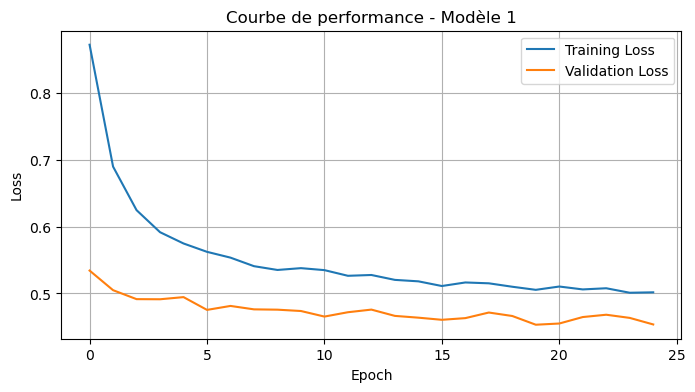

Matrice de confusion - Modèle 1:


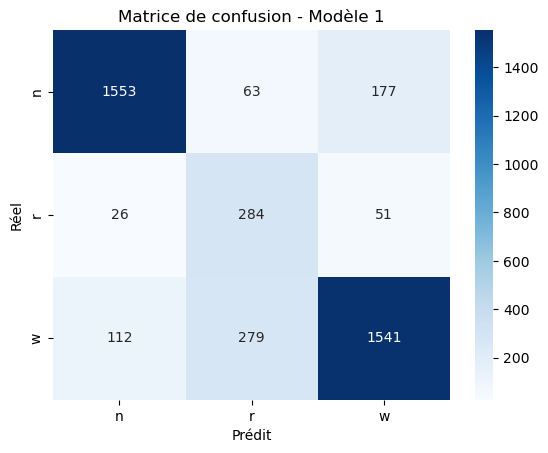

Rapport de classification - Modèle 1:
              precision    recall  f1-score   support

           n       0.92      0.87      0.89      1793
           r       0.45      0.79      0.58       361
           w       0.87      0.80      0.83      1932

    accuracy                           0.83      4086
   macro avg       0.75      0.82      0.77      4086
weighted avg       0.85      0.83      0.84      4086

Modèle 2 entraîné (21 époques exécutées).


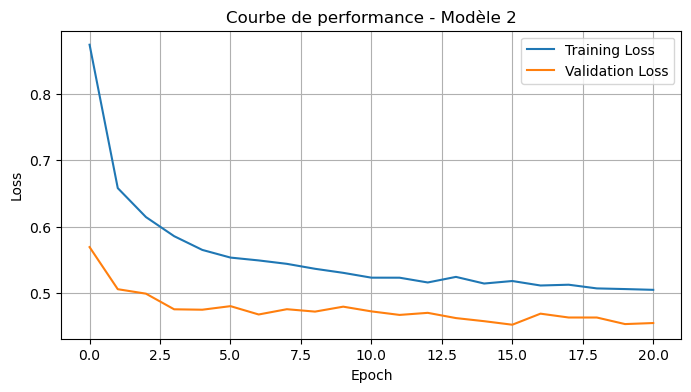

Matrice de confusion - Modèle 2:


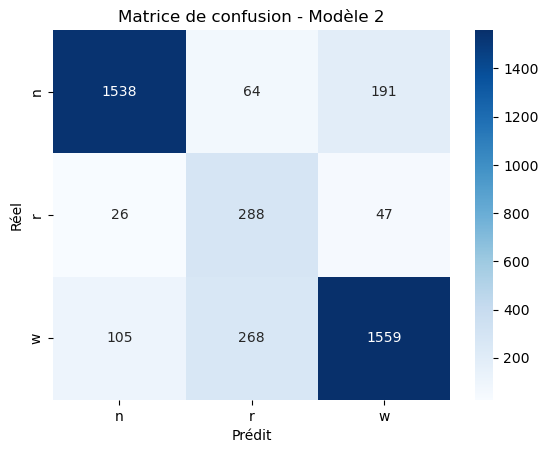

Rapport de classification - Modèle 2:
              precision    recall  f1-score   support

           n       0.92      0.86      0.89      1793
           r       0.46      0.80      0.59       361
           w       0.87      0.81      0.84      1932

    accuracy                           0.83      4086
   macro avg       0.75      0.82      0.77      4086
weighted avg       0.86      0.83      0.84      4086

Modèle 3 entraîné (13 époques exécutées).


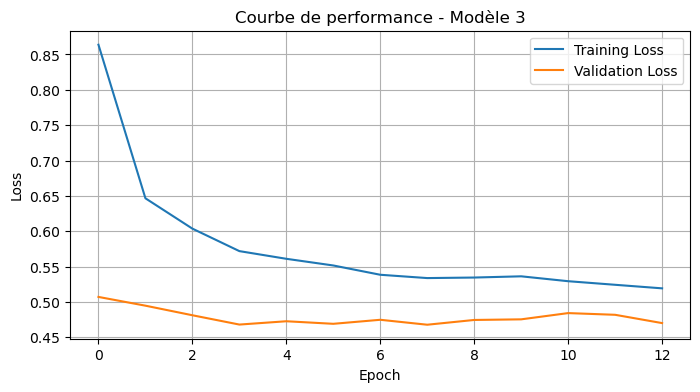

Matrice de confusion - Modèle 3:


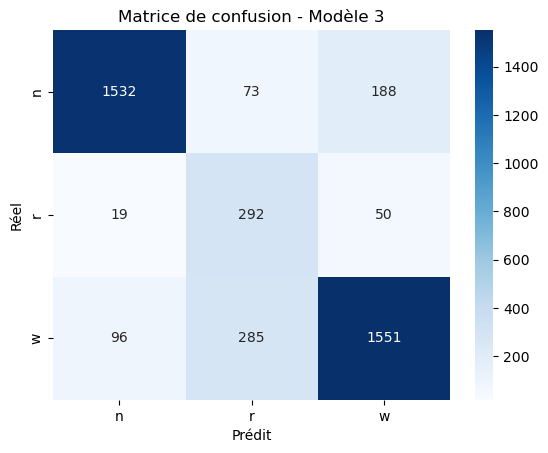

Rapport de classification - Modèle 3:
              precision    recall  f1-score   support

           n       0.93      0.85      0.89      1793
           r       0.45      0.81      0.58       361
           w       0.87      0.80      0.83      1932

    accuracy                           0.83      4086
   macro avg       0.75      0.82      0.77      4086
weighted avg       0.86      0.83      0.84      4086

Modèle 4 entraîné (16 époques exécutées).


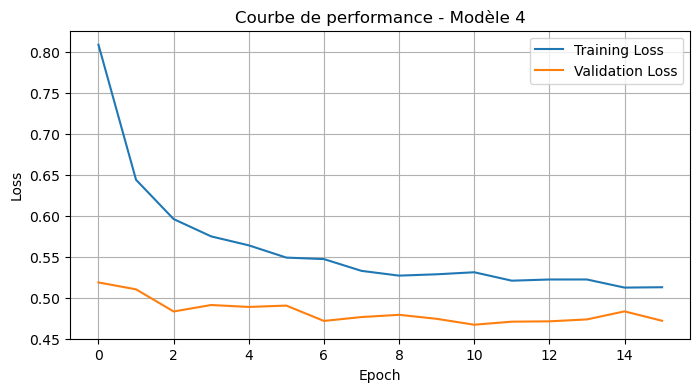

Matrice de confusion - Modèle 4:


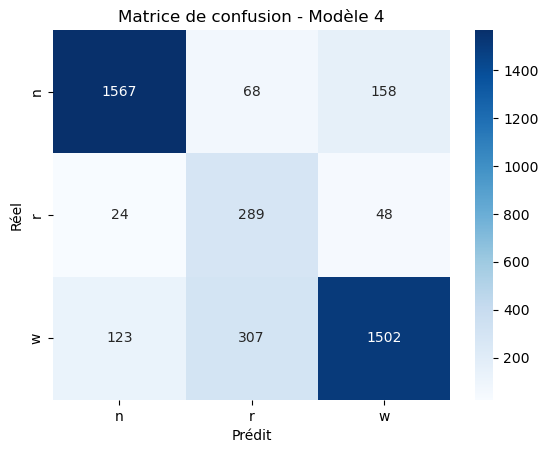

Rapport de classification - Modèle 4:
              precision    recall  f1-score   support

           n       0.91      0.87      0.89      1793
           r       0.44      0.80      0.56       361
           w       0.88      0.78      0.83      1932

    accuracy                           0.82      4086
   macro avg       0.74      0.82      0.76      4086
weighted avg       0.86      0.82      0.83      4086

Modèle 5 entraîné (19 époques exécutées).


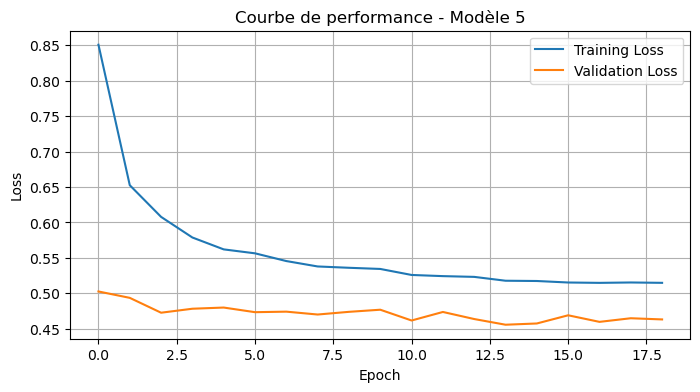

Matrice de confusion - Modèle 5:


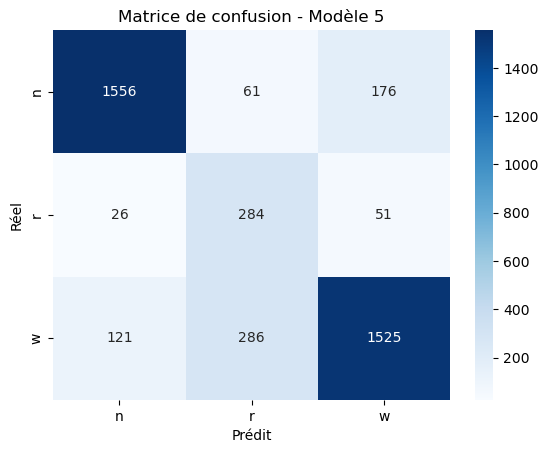

Rapport de classification - Modèle 5:
              precision    recall  f1-score   support

           n       0.91      0.87      0.89      1793
           r       0.45      0.79      0.57       361
           w       0.87      0.79      0.83      1932

    accuracy                           0.82      4086
   macro avg       0.74      0.81      0.76      4086
weighted avg       0.85      0.82      0.83      4086



In [23]:
# 90%/10% split for internal training/validation (last 10% of time as validation)

N = X_scaled.shape[0]
val_size = int(0.1 * N)
X_train_full, X_val_full = X_scaled[:N-val_size], X_scaled[N-val_size:]
y_train_full, y_val_full = y_onehot[:N-val_size], y_num[N-val_size:]

models = []
histories = []

for i in range(5):
    model = create_mlp(X_train_full.shape[1])
    es = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
    history = model.fit(X_train_full, y_train_full, epochs=50, batch_size=32, verbose=0, 
                        validation_data=(X_val_full, np.eye(num_classes)[y_val_full]), 
                        callbacks=[es], class_weight=class_weight_dict)
    models.append(model)
    histories.append(history.history)
    print(f"Modèle {i+1} entraîné ({len(history.history['loss'])} époques exécutées).")

    # Display of the performance curve
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Courbe de performance - Modèle {i+1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Predictions on validation set and confusion matrix
    y_pred_val = model.predict(X_val_full, verbose=0).argmax(axis=1)
    cm = confusion_matrix(y_val_full, y_pred_val)
    print(f"Matrice de confusion - Modèle {i+1}:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
    plt.xlabel('Prédit')
    plt.ylabel('Réel')
    plt.title(f'Matrice de confusion - Modèle {i+1}')
    plt.show()

    print(f"Rapport de classification - Modèle {i+1}:")
    print(classification_report(y_val_full, y_pred_val, target_names=unique_classes))

In [24]:
# Average of predicted probabilities from each model (ensemble)
test_probs = np.zeros((test.shape[0], num_classes))
for model in models:
    test_probs += model.predict(scaler.transform(test[feature_cols]), verbose=0)
test_probs /= len(models)

# Conversion to predicted labels ('n', 'r', 'w')
test_pred_indices = test_probs.argmax(axis=1)
idx_to_class = {v: k for k, v in class_to_idx.items()}
test_pred_labels = np.array([idx_to_class[idx] for idx in test_pred_indices])

# Saving predictions
np.save('test_pred.npy', test_pred_labels)
print("Prédictions sauvegardées dans test_pred.npy")
print("Exemple de prédictions :", test_pred_labels[:10])
print("Nombre total de prédictions :", test_pred_labels.shape)

Prédictions sauvegardées dans test_pred.npy
Exemple de prédictions : ['n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n' 'n']
Nombre total de prédictions : (80109,)
